## Get DEMs of AHN4 and make preprocessed datasets

### import libraries

In [1]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm, trange
import math
# files
import requests
from io import BytesIO
from zipfile import ZipFile
import os
import shutil
from pathlib import Path
# from scipy import interpolate
import matplotlib.pyplot as plt
# GIS
from osgeo import gdal
import rasterio
from affine import Affine
import richdem as rd
from rasterio.fill import fillnodata
# torch and dataset
import torch
import torchvision
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

# functions

# from dataFunctions import *


### Get all required DEMs

1. path 
2. csv file is loaded from (ArcGis)[https://services.arcgis.com/nSZVuSZjHpEZZbRo/arcgis/rest/services/Kaartbladen_AHN4/]

In [2]:
path_root = '/Volumes/HydesT7/Grad Project/Data/'
pd_AHN4 = pd.read_csv(path_root + 'Kaartbladen_AHN4.csv')


In [3]:
pd_AHN4


,OBJECTID,Name,AHN4_DTM_05m,AHN4_DTM_5m,AHN4_DSM_05m,AHN4_DSM_5m,AHN4_LAZ,Shape__Area,Shape__Length
0,1,01CZ1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1,2,01CZ2,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
2,3,01DZ1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
3,4,01DZ2,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
4,5,01GN1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
...,...,...,...,...,...,...,...,...,...
1004,1006,69FN1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1005,1007,69FZ1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1006,1008,69GN1,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500
1007,1009,69GN2,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/02b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03a_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/03b_...,https://ns_hwh.fundaments.nl/hwh-ahn/ahn4/01_L...,31250000,22500


3. Download and unzip all files

In [4]:
print("Downloading...")
path_download = path_root + 'AHN4_all/'
Path(path_download).mkdir(parents=True, exist_ok=True)

for i in tqdm(range(len(pd_AHN4["AHN4_DSM_5m"].values))):

    url_DTM5 = pd_AHN4["AHN4_DTM_5m"].values[i]
    url_DSM5 = pd_AHN4["AHN4_DSM_5m"].values[i]
    filename_DTM5 = url_DTM5.split("/")[-1]
    filename_DSM5 = url_DSM5.split("/")[-1]

    if Path(path_download+filename_DTM5[:-3]+'TIF').is_file() and Path(path_download+filename_DSM5[:-3]+'TIF').is_file():
        continue

    r_DTM5 = requests.get(url_DTM5, stream=True)
    r_DSM5 = requests.get(url_DSM5, stream=True)

    with open(path_download + filename_DTM5, "wb") as zip_dtm:
        for chunk in r_DTM5.iter_content(chunk_size=1024):
            # writing one chunk at a time to pdf file
            if chunk:
                zip_dtm.write(chunk)

    with open(path_download + filename_DSM5, "wb") as zip_dsm:
        for chunk in r_DSM5.iter_content(chunk_size=1024):
            # writing one chunk at a time to pdf file
            if chunk:
                zip_dsm.write(chunk)

print('Unzipping...')
pbar = tqdm(total=len(os.listdir(path_download)))
extension = ".zip"
for item in os.listdir(path_download):  # loop through items in dir
    if item.endswith(extension):  # check for ".zip" extension
        file_name = path_download + item  # get full path of files
        zip_ref = ZipFile(file_name)  # create zipfile object
        zip_ref.extractall(path_download)  # extract file to dir
        zip_ref.close()  # close file
        os.remove(file_name)  # delete zipped file
    pbar.update(1)
pbar.close()


Downloading...


100%|██████████| 1009/1009 [00:00<00:00, 35824.78it/s]


Unzipping...


100%|██████████| 2939/2939 [00:00<00:00, 807008.80it/s]


In [5]:
len(np.unique(pd_AHN4['AHN4_DSM_5m'].values))


979

In [6]:
u, c = np.unique(pd_AHN4['Name'].values, return_counts=True)
dup = u[c > 1]
dup


array(['39AZ2', '39CN2', '39CZ2', '43DN2', '43DZ1', '43DZ2', '43EZ2',
       '43FZ1', '43FZ2', '43GN1', '43GN2', '43HN1', '43HN2', '44AZ1',
       '44AZ2', '44BZ1', '44BZ2', '44EZ1', '44EZ2', '44FZ1', '44FZ2',
       '45AN2', '45AZ1', '45AZ2', '49BN1', '49BN2', '49BZ1', '49DN1',
       '49DN2', '49DZ2'], dtype=object)

In [8]:
# from osgeo import gdal
# import rasterio
# from affine import Affine


4. take the patches in which the no-data areas are smaller than 1/8 of the overall area.

In [7]:
path_ANH4 = '/Volumes/HydesT7/Grad Project/Data/AHN4_all/'
ndv = 3.4028230607371e+38
count_all = 0
count_check = 0
item_check = []
for item in os.listdir(path_ANH4):
    if item.startswith('R5') and item.endswith('.TIF'):
        count_all += 1
        data_ = gdal.Open(path_ANH4 + item, gdal.GA_ReadOnly)
        band_ = data_.GetRasterBand(1)
        no_data = band_.GetNoDataValue()
        band_.SetNoDataValue(ndv)
        ele_ = band_.ReadAsArray()
        masked_ = np.ma.masked_where(ele_ > no_data/10, ele_)
        if np.count_nonzero(masked_.mask == True) / (masked_.mask.shape[0]*masked_.mask.shape[1]) < 1/8:
            count_check += 1
            item_check.append(item[3:-4])

print(count_check, count_all)
# with open(path_ANH4+'picked.txt', 'w') as f:
#     for it in item_check:
#         f.write(it)
#         f.write('\n')


508 979


In [111]:
item_check


['05FZ1',
 '05FZ2',
 '05GN2',
 '05GZ1',
 '05GZ2',
 '05HN1',
 '05HN2',
 '05HZ1',
 '05HZ2',
 '06AN2',
 '06AZ1',
 '06AZ2',
 '06BN1',
 '06BN2',
 '06BZ1',
 '06BZ2',
 '06CN1',
 '06CN2',
 '06CZ1',
 '06CZ2',
 '06DN1',
 '06DN2',
 '06DZ1',
 '06EN1',
 '06EZ1',
 '06GN1',
 '06GN2',
 '06GZ1',
 '06GZ2',
 '09BN2',
 '09BZ2',
 '10BZ2',
 '10EN1',
 '10EN2',
 '10EZ1',
 '10EZ2',
 '10FN1',
 '10FN2',
 '10FZ1',
 '10FZ2',
 '10GN1',
 '10GN2',
 '10HN1',
 '10HZ1',
 '11AN1',
 '11AN2',
 '11AZ1',
 '11BN2',
 '11BZ1',
 '11BZ2',
 '11CN2',
 '11CZ1',
 '11CZ2',
 '11DN1',
 '11DN2',
 '11DZ1',
 '11DZ2',
 '11EN1',
 '11EZ1',
 '11EZ2',
 '11FZ1',
 '11GN1',
 '11GN2',
 '11GZ1',
 '11GZ2',
 '11HN1',
 '11HN2',
 '11HZ1',
 '11HZ2',
 '14BN1',
 '14BZ1',
 '14BZ2',
 '14CZ2',
 '14DN1',
 '14DN2',
 '14DZ1',
 '14DZ2',
 '14EZ2',
 '14FZ1',
 '14GN1',
 '14GN2',
 '14GZ1',
 '14GZ2',
 '14HN1',
 '14HZ1',
 '15EN2',
 '15FN2',
 '16AN2',
 '16AZ1',
 '16AZ2',
 '16BN1',
 '16BN2',
 '16BZ2',
 '16EN1',
 '16EN2',
 '19AN2',
 '19AZ2',
 '19BN1',
 '19BN2',
 '19BZ1',


### Preprocessing
- input: patches of DSMs and DTMs
1. resampling
2. fill the no-data areas
3. compute the slop, aspect, TRI, TPI, and roughness


In [8]:
# import richdem as rd
# import dataFunctions
# from rasterio.fill import fillnodata
path_ANH4 = '/Volumes/HydesT7/Grad Project/Data/AHN4_all/'
path_in = path_ANH4
path_out = '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8/'
Path(path_out).mkdir(parents=True, exist_ok=True)

xres = 30
yres = 30
resample_alg = 'average'


In [9]:
def checkNodata(file):
    rda = rd.LoadGDAL(file)
    # _ = rd.rdShow(rda, axes=True, cmap='turbo', figsize=(6, 5.5))
    rdnpa = np.asarray(rda)
    if rda.no_data>0:
        return np.any(rdnpa>rda.no_data-1)
    else:
        return np.any(rdnpa<rda.no_data+1)

In [10]:
list_hasnodata = []
pbar_ = tqdm(total=len(item_check))

for it in item_check:
# it = item_check[0]
    dsm5 = path_in+'R5_'+it+'.TIF'
    dtm5 = path_in+'M5_'+it+'.TIF'
    # resample:
    dsm30 = path_out+'R30_'+it+'.TIF'
    _ = gdal.Warp(dsm30, dsm5, xRes=xres, yRes=yres, resampleAlg=resample_alg)
    _ = None

    dtm30 = path_out+'M30_'+it+'.TIF'
    _ = gdal.Warp(dtm30, dtm5, xRes=xres, yRes=yres, resampleAlg=resample_alg)
    _ = None

    # fill nodata (for dsm30)
    with rasterio.open(dsm30) as src:
        profile = src.profile
        arr = src.read(1)
        arr_filled = fillnodata(arr, mask=src.read_masks(1), smoothing_iterations=0)

    dsm30f = path_out+'R30_'+it+'_filled.TIF'  
    with rasterio.open(dsm30f, 'w', **profile) as dest:
        dest.write_band(1, arr_filled)

    # compute attributes
    # "slope", "aspect", "TRI", "TPI", "Roughness"
    slope_ = path_out+'R30_'+it+'_slope.TIF'
    _ = gdal.DEMProcessing(slope_, dsm30f, 'slope', computeEdges=True)
    _ = None
    if checkNodata(slope_):
        list_hasnodata.append(slope_)

    aspect_ = path_out+'R30_'+it+'_aspect.TIF'
    _ = gdal.DEMProcessing(aspect_, dsm30f, 'aspect', computeEdges=True)
    _ = None
    if checkNodata(aspect_):
        list_hasnodata.append(aspect_)

    tri_ = path_out+'R30_'+it+'_TRI.TIF'
    _ = gdal.DEMProcessing(tri_, dsm30f, 'TRI', computeEdges=True)
    _ = None
    if checkNodata(tri_):
        list_hasnodata.append(tri_)

    tpi_ = path_out+'R30_'+it+'_TPI.TIF'
    _ = gdal.DEMProcessing(tpi_, dsm30f, 'TPI', computeEdges=True)
    _ = None
    if checkNodata(tpi_):
        list_hasnodata.append(tpi_)

    roughness_ = path_out+'R30_'+it+'_Roughness.TIF'
    _ = gdal.DEMProcessing(roughness_, dsm30f, 'Roughness', computeEdges=True)
    _ = None
    if checkNodata(roughness_):
        list_hasnodata.append(roughness_)

    pbar_.update(1)
pbar_.close()

    

100%|██████████| 508/508 [01:33<00:00,  5.42it/s]


In [11]:
list_hasnodata

['/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8/R30_64GN1_aspect.TIF',
 '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8/R30_49FZ1_aspect.TIF',
 '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8/R30_69EZ2_aspect.TIF']

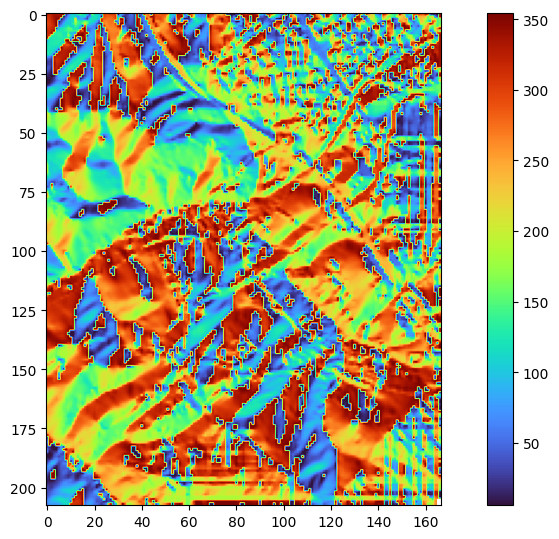

/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8/R30_69EZ2_aspect.TIF [[206 166]
 [207 166]]


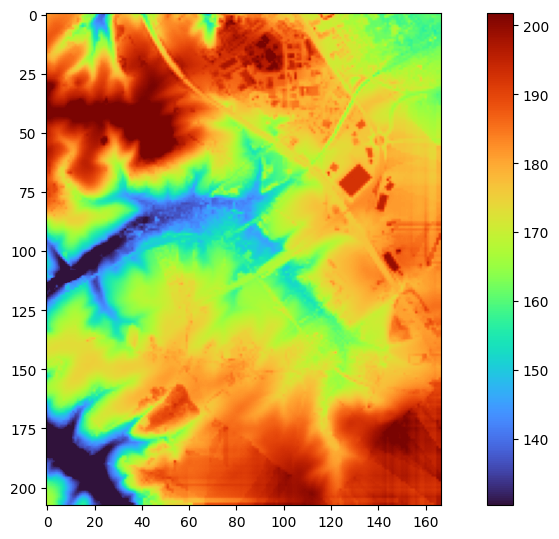

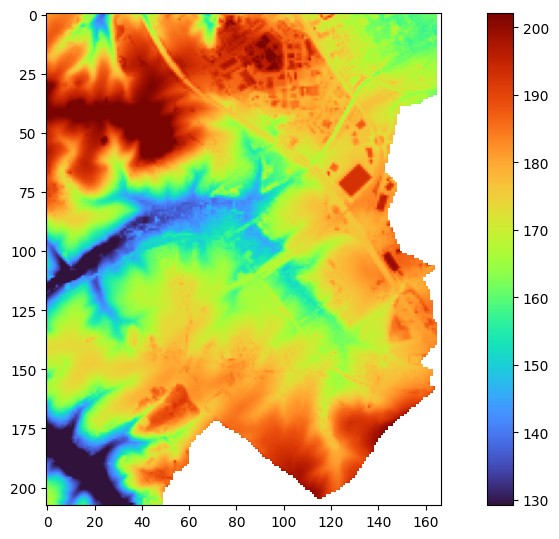

In [12]:
sa_ = random.choice(list_hasnodata)
# for sa_ in samples:
    # print(sa_)
rda = rd.LoadGDAL(sa_)
_ = rd.rdShow(rda, axes=True, cmap='turbo', figsize=(6, 5.5))
rdnpa = np.asarray(rda)

# print(sa_, np.argwhere(np.logical_and(rdnpa>rda.no_data+1, rdnpa<0)))
# print(sa_, np.argwhere(rdnpa>360))
print(sa_, np.argwhere(rdnpa<rda.no_data+1))


fill_file = sa_.replace(sa_.split('_')[-1], "")+'filled.TIF'

rda_ = rd.LoadGDAL(fill_file)
_ = rd.rdShow(rda_, axes=True, cmap='turbo', figsize=(6, 5.5))

rfile = sa_.replace(sa_.split('_')[-1], "")[:-1]+'.TIF'
rda_ = rd.LoadGDAL(rfile)
_ = rd.rdShow(rda_, axes=True, cmap='turbo', figsize=(6, 5.5))

# rdnpa = np.asarray(rda)

# with rasterio.open(path_out+sa_) as src:
#     profile = src.profile
#     arr = src.read(1)
#     arr_filled = fillnodata(arr, mask=src.read_masks(1), smoothing_iterations=0)

# saf = path_out+sa_[:-4]+'_f.TIF'
# with rasterio.open(saf, 'w', **profile) as dest:
#     dest.write_band(1, arr_filled)


# rda_ = rd.LoadGDAL(saf)
# _ = rd.rdShow(rda_, axes=True, cmap='turbo', figsize=(6, 5.5))
# rdnpa_ = np.asarray(rda_)

# print(saf, np.argwhere(rdnpa_>=rda_.no_data-1))


In [13]:
for it in list_hasnodata:
    it_ = it.split('_')[-2]
    # print(it_)
    item_check.remove(it_)

In [14]:
len(item_check)

505

In [15]:
with open(path_ANH4+'picked.txt', 'w') as f:
    for it in item_check:
        f.write(it)
        f.write('\n')

### Make datasets

In [17]:
list_patch = []
with open(path_ANH4+'picked.txt') as fp:
    # list_patch.append(patch)
    list_patch = [line.rstrip('\n') for line in fp]
print(list_patch[:5], len(list_patch))

['05FZ1', '05FZ2', '05GN2', '05GZ1', '05GZ2'] 505


In [18]:
path_pre = '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed_1_8/'
ls_dsm30 = []
ls_dtm30 = []
ls_dsm30_fill = []
ls_dsm30_aspect = []
ls_dsm30_Roughness = []
ls_dsm30_slope = []
ls_dsm30_TPI = []
ls_dsm30_TRI = []
for name in list_patch:
    ls_dsm30.append('R30_'+name+'.TIF')
    ls_dtm30.append('M30_'+name+'.TIF')
    ls_dsm30_fill.append('R30_'+name+'_filled.TIF')
    ls_dsm30_aspect.append('R30_'+name+'_aspect.TIF')
    ls_dsm30_Roughness.append('R30_'+name+'_Roughness.TIF')
    ls_dsm30_slope.append('R30_'+name+'_slope.TIF')
    ls_dsm30_TPI.append('R30_'+name+'_TPI.TIF')
    ls_dsm30_TRI.append('R30_'+name+'_TRI.TIF')


In [19]:
def readTIFF(path, tiff, masked=False):
    dem = rd.LoadGDAL(path+tiff)
    no_data = dem.no_data
    if not masked:
        return np.asarray(dem)
    elif no_data > 0:
        dem_np = np.asarray(dem)
        return np.ma.masked_where(dem_np > no_data/10, dem_np)
    else:
        dem_np = np.asarray(dem)
        return np.ma.masked_where(dem_np < no_data/10, dem_np)


In [20]:
def normalizeRela(arr):
    arr_mean = np.mean(arr)
    arr_std = np.std(arr)
    return (arr-arr_mean)/arr_std


def slicePic(pic, cut_width, cut_length):
    sliced_pic = []
    width = pic.data.shape[0]
    length = pic.data.shape[1]
    num_width = int(width/cut_width)
    num_length = int(length/cut_length)
    for i in range(0, num_width):
        for j in range(0, num_length):
            # dtm_ = dtm[i*cut_width:(i+1)*cut_width, j*cut_length:(j+1)*cut_length]
            # dsm_ = dsm[i*cut_width:(i+1)*cut_width, j*cut_length:(j+1)*cut_length]
            pic_ = pic[i*cut_width:(i+1)*cut_width, j *
                       cut_length:(j+1)*cut_length]
            # mean_pic_ = np.mean(pic_[:, :, 0])
            # std_pic_ = np.std(pic_[:, :, 0])
            # pic_[:, :, 0] = (pic_[:, :, 0]-mean_pic_)/std_pic_
            sliced_pic.append(pic_)
    return sliced_pic


def sliceRisPic(pic, cut_width, cut_length, dt=False):
    dt_sliced_pic = {}
    ls_sliced_pic = []
    width = pic.data.shape[0]
    length = pic.data.shape[1]
    num_width = math.ceil(width/cut_width)
    num_length = math.ceil(length/cut_length)
    for i in range(0, num_width):
        for j in range(0, num_length):
            pic_ = np.zeros((cut_width, cut_length))
            key_ = ''
            if i <= num_width-2 and j <= num_length-2:
                pic_ = pic[i*cut_width:(i+1)*cut_width,
                           j * cut_length:(j+1)*cut_length]
                key_ = str(i*cut_width)+':'+str((i+1)*cut_width) + \
                    ','+str(j*cut_length)+':'+str((j+1)*cut_length)
                # sliced_pic[key_]=pic_
            elif i <= num_width-2 and j == num_length-1:
                pic_ = pic[i*cut_width:(i+1)*cut_width,
                           length-cut_length:length]
                key_ = str(i*cut_width)+':'+str((i+1)*cut_width) + \
                    ','+str(length-cut_length)+':'+str(length)
                # sliced_pic[key_]=pic_
            elif i == num_width-1 and j <= num_length-2:
                pic_ = pic[width-cut_width:width,
                           j * cut_length:(j+1)*cut_length]
                key_ = str(width-cut_width)+':'+str(width)+',' + \
                    str(j*cut_length)+':'+str((j+1)*cut_length)
            else:
                pic_ = pic[width-cut_width:width, length-cut_length:length]
                key_ = str(width-cut_width)+':'+str(width)+',' + \
                    str(length-cut_length)+':'+str(length)
                # sliced_pic[key_]=pic_
            # sliced_pic[key_]=pic_
            if not dt:
                ls_sliced_pic.append(pic_)
            else:
                dt_sliced_pic[key_] = pic_
    if not dt:
        return ls_sliced_pic
    else:
        return dt_sliced_pic




def augmentateData(pics):
    pics_augmentated = []
    for pic in pics:
        pic_rot90 = np.rot90(pic)
        pic_rot180 = np.rot90(pic, 2)
        pic_rot270 = np.rot90(pic, 3)
        pic_flip = np.fliplr(pic)
        pic_flip_rot90 = np.rot90(pic_flip)
        pic_flip_rot180 = np.rot90(pic_flip, 2)
        pic_flip_rot270 = np.rot90(pic_flip, 3)
        pics_augmentated += [pic_rot90, pic_rot180, pic_rot270,
                             pic_flip, pic_flip_rot90, pic_flip_rot180, pic_flip_rot270]
    return pics_augmentated


In [21]:
def generateGroundTruth(dsm, dtm):
    length = dsm.shape[0]
    width = dsm.shape[1]
    mask_ = np.zeros((2, length, width), dtype=bool)
    for i in range(length):
        for j in range(width):
            mask_[0][i][j] = True
            if dsm.mask[i][j] == False:
                if dtm.mask[i][j] == True:
                    mask_[1][i][j] = True
                    mask_[0][i][j] = False
                elif dsm.data[i][j] - dtm.data[i][j] > 2.0:
                    mask_[1][i][j] = True
                    mask_[0][i][j] = False
    return mask_


In [22]:
def getNormalParams(lt):
    ltar = np.asarray(lt, dtype=np.float64)
    mean_ar = np.mean(ltar)
    std_ar = np.std(ltar)
    return mean_ar, std_ar


In [23]:
cut_length = 64
cut_width = 64

dsm_slices = []
dtm_slices = []
ground_truth_slices = []
dsm_fill_slices = []
dsm_fill_arrs = []
aspect_slices = []
aspect_arrs = []
roughness_slices = []
roughness_arrs = []
slope_slices = []
slope_arrs = []
tpi_slices = []
tpi_arrs=[]
tri_slices = []
tri_arrs=[]

for i in trange(len(list_patch)):
    dsm30 = readTIFF(path_pre, ls_dsm30[i], masked=True)
    dtm30 = readTIFF(path_pre, ls_dtm30[i], masked=True)
    dsm30_fill = readTIFF(path_pre, ls_dsm30_fill[i])
    dsm30_aspect = readTIFF(path_pre, ls_dsm30_aspect[i])
    dsm30_slope = readTIFF(path_pre, ls_dsm30_slope[i])
    dsm30_Roughness = readTIFF(path_pre, ls_dsm30_Roughness[i])
    dsm30_TPI = readTIFF(path_pre, ls_dsm30_TPI[i])
    dsm30_TRI = readTIFF(path_pre, ls_dsm30_TRI[i])

    dsm_fill_arrs.append(dsm30_fill)
    aspect_arrs.append(dsm30_aspect)
    slope_arrs.append(dsm30_slope)
    roughness_arrs.append(dsm30_Roughness)
    tpi_arrs.append(dsm30_TPI)
    tri_arrs.append(dsm30_TRI)

    dsm_slices += sliceRisPic(dsm30, cut_width, cut_length)
    dtm_slices += sliceRisPic(dtm30, cut_width, cut_length)
    dsm_fill_slices += sliceRisPic(dsm30_fill, cut_width, cut_length)
    aspect_slices += sliceRisPic(dsm30_aspect, cut_width, cut_length)
    roughness_slices += sliceRisPic(dsm30_slope, cut_width, cut_length)
    slope_slices += sliceRisPic(dsm30_Roughness, cut_width, cut_length)
    tpi_slices += sliceRisPic(dsm30_TPI, cut_width, cut_length)
    tri_slices += sliceRisPic(dsm30_TRI, cut_width, cut_length)

mean_dsm, std_dsm = getNormalParams(dsm_fill_arrs)
mean_aspect, std_aspect = getNormalParams(aspect_arrs)
mean_slope, std_slope = getNormalParams(slope_arrs)
mean_roughness, std_roughness = getNormalParams(roughness_arrs)
mean_tpi, std_tpi = getNormalParams(tpi_arrs)
mean_tri, std_tri = getNormalParams(tri_arrs)


dsm_slices += augmentateData(dsm_slices)
dtm_slices += augmentateData(dtm_slices)
dsm_fill_slices += augmentateData(dsm_fill_slices)
aspect_slices += augmentateData(aspect_slices)
roughness_slices += augmentateData(roughness_slices)
slope_slices += augmentateData(slope_slices)
tpi_slices += augmentateData(tpi_slices)
tri_slices += augmentateData(tri_slices)


for nn in trange(len(dsm_slices)):
    ground_truth_slices.append(
        generateGroundTruth(dsm_slices[nn], dtm_slices[nn]))


100%|██████████| 48480/48480 [17:40<00:00, 45.73it/s]


In [24]:
para_means = np.asarray([mean_dsm, mean_aspect, mean_slope, mean_roughness, mean_tpi, mean_tri])
para_stds = np.asarray([std_dsm, std_aspect, std_slope, std_roughness, std_tpi, std_tri])

In [25]:
para_means

array([ 9.58922932e+00,  1.82313887e+02,  1.33782967e+00,  2.44634462e+00,
       -7.62216900e-06,  2.95785730e+00])

In [26]:
def stackPics(dsm_fill, slope, layer, normalization=False):
    pics = []
    for n in range(len(dsm_fill)):
        if normalization:
            pics.append(np.stack((normalizeRela(dsm_fill[n]), normalizeRela(
                slope[n]), normalizeRela(layer[n])), axis=2))
        else:
            pics.append(np.stack((dsm_fill[n], slope[n], layer[n]), axis=2))
    arr_pics = np.stack(pics)
    arr_pics = arr_pics.astype(np.float32)
    return arr_pics

In [27]:
Pics_aspect = stackPics(dsm_fill_slices, slope_slices, aspect_slices)
Pics_roughness = stackPics(dsm_fill_slices, slope_slices, roughness_slices)
Pics_tpi = stackPics(dsm_fill_slices, slope_slices, tpi_slices)
Pics_tri = stackPics(dsm_fill_slices, slope_slices, tri_slices)


In [28]:
Masks = np.stack(ground_truth_slices)
Masks = Masks.astype(np.float32)
Masks.shape

(48480, 2, 64, 64)

In [29]:
Pics_roughness.shape

(48480, 64, 64, 3)

In [30]:
out_file_path = '/Volumes/HydesT7/Grad Project/Data/U_Net/64_64_1_8/'
Path(out_file_path).mkdir(parents=True, exist_ok=True)
np.save(out_file_path+'Pics_aspect', Pics_aspect)
np.save(out_file_path+'Pics_roughness', Pics_roughness)
np.save(out_file_path+'Pics_tpi', Pics_tpi)
np.save(out_file_path+'Pics_tri', Pics_tri)
np.save(out_file_path+'Masks', Masks)


In [31]:
np.save(out_file_path+'para_means', para_means)
np.save(out_file_path+'para_stds', para_stds)

In [1]:
import dataFunctions
sa = random.choice(ls_dsm30_fill)
# dem = rd.LoadGDAL(path_pre+sa)
dem = dataFunctions.readTIFF(path_pre, sa)
dem
# _ = rd.rdShow(dem, axes=True, cmap='turbo', figsize=(6, 5.5))


NameError: name 'random' is not defined

In [32]:
dem_n = np.asarray(dem)


(array([  0,   0,   0, ..., 207, 207, 207]),
 array([  0,   1,   2, ..., 164, 165, 166]))

### old codes:

In [35]:
path_in = path_ANH4
path_out = '/Volumes/HydesT7/Grad Project/Data/AHN4_preprocessed/'
# file_in = path_in+item_check[0]
# file_out = path_out+item_check[0][:-4]+'_res30.tif'

# xres=30
# yres=30
# resample_alg = 'average'

# ds = gdal.Warp(file_out, file_in, xRes=xres, yRes=yres, resampleAlg=resample_alg)
# ds = None


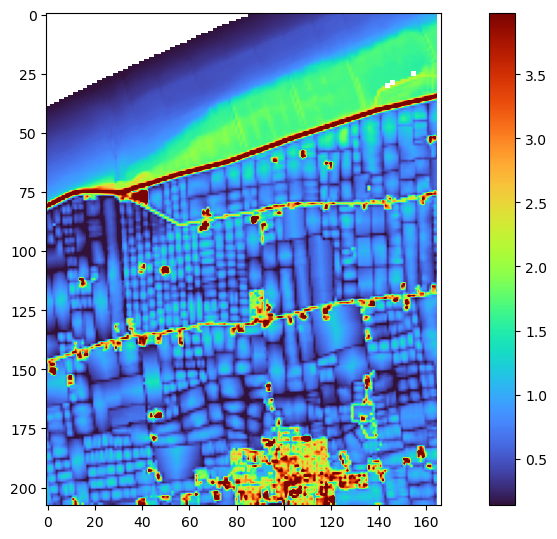

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import richdem as rd

import dataFunctions

dem = rd.LoadGDAL(file_out)
ndv = 3.4028230607371e+38

# dem = np.asarray(dem)
# plt.subplot(1, 2, 1)
# ras = dataFunctions.readTIFF(path_out, item_check[0][:-4]+'_res30.tif')
_ = rd.rdShow(dem, axes=True, cmap='turbo', figsize=(6, 5.5))
# plt.imshow(dem, interpolation='none')
# plt.imshow(dem, interpolation='none', cmap='terrain')


# plt.imshow(ras.data)
# plt.colorbar()
# plt.show()


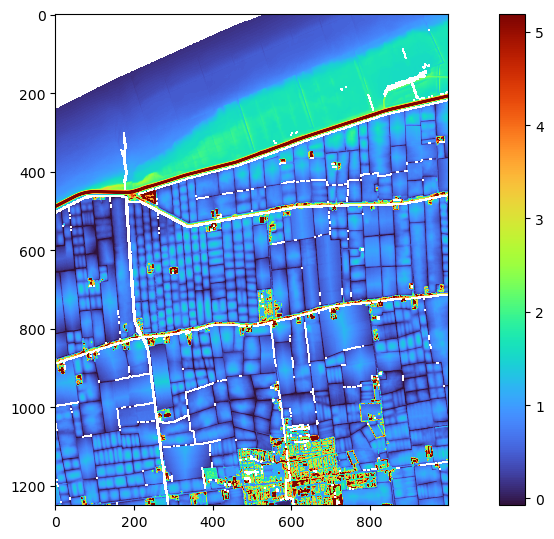

In [37]:
dem = rd.LoadGDAL(file_in)
_ = rd.rdShow(dem, axes=True, cmap='turbo', figsize=(6, 5.5))


In [123]:
ndv = dem[0][0]


In [39]:
from rasterio.fill import fillnodata

# ras = dataFunctions.readTIFF(path_out, item_check[0][:-4]+'_res30.tif')
# ras.mask = ras.mask.astype(np.int16)
# ras_filled = fill.fillnodata(ras, ras.mask)
# ras.mask = ras.mask.astype(np.int16)

with rasterio.open(file_out) as src:
    profile = src.profile
    arr = src.read(1)
    arr_filled = fillnodata(arr, mask=src.read_masks(1),
                            smoothing_iterations=0)

newtif_file = path_out+item_check[0][:-4]+'_30_filled.tif'
with rasterio.open(newtif_file, 'w', **profile) as dest:
    dest.write_band(1, arr_filled)


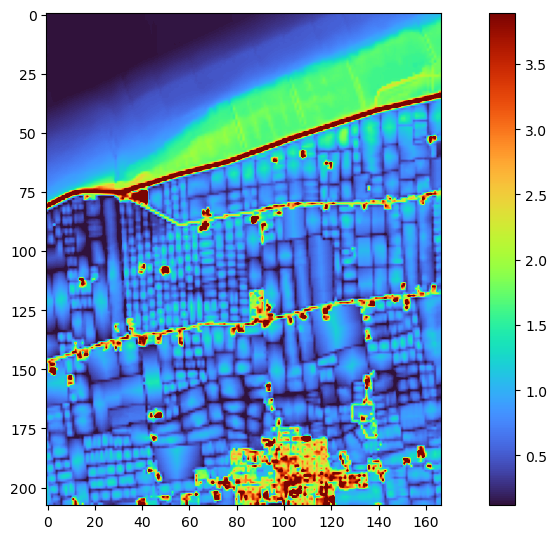

In [40]:
dem_ = rd.LoadGDAL(newtif_file)
_ = rd.rdShow(dem_, axes=True, cmap='turbo', figsize=(6, 5.5))


In [128]:
file_out = path_out+item_check[2][:-4]+'_30_slope.tif'

ds_ = gdal.DEMProcessing(file_out, newtif_file, 'slope', computeEdges=True)
ds_ = None


In [ ]:
gdal.DEMProcessing()


In [112]:
ras_filled = rd.rdarray(arr_filled, no_data=ndv)


In [1]:
from otherFunctions import rdShow


In [5]:
slope = rd.LoadGDAL(file_out)
slope = np.asarray(slope)
rdShow(slope, axes=True, cmap='magma', figsize=(6, 5.5))


NameError: name 'file_out' is not defined

In [114]:
ras_filled.shape


(208, 167)

In [116]:
dem.shape


(208, 167)

In [53]:
dem = np.asarray(dem)


In [54]:
gdal.FillNodata()


array([[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 1.0422570e+00,
        1.0553972e+00, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 1.0702146e+00,
        1.1127838e+00, 3.4028235e+38],
       [3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ..., 1.1700921e+00,
        1.2371302e+00, 3.4028235e+38],
       ...,
       [1.1181267e+00, 1.0969100e+00, 6.5039194e-01, ..., 3.6103174e-01,
        9.1390455e-01, 3.4028235e+38],
       [1.0287095e+00, 9.5588768e-01, 7.2244066e-01, ..., 4.4526455e-01,
        1.0196025e+00, 3.4028235e+38],
       [1.1463768e+00, 7.2427207e-01, 7.0493817e-01, ..., 5.8897799e-01,
        8.9907271e-01, 3.4028235e+38]], dtype=float32)

In [ ]:
gdal.DEMProcessing()


In [ ]:
gdal.DEMProcessingOptions()


In [31]:
gdal.WarpOptions()


(<osgeo.gdal.GDALWarpAppOptions; proxy of <Swig Object of type 'GDALWarpAppOptions *' at 0x7fadc0263570> >,
 None,
 None)

In [15]:
data_r = gdal.Open(path_ANH4 + 'R5_30GN1.TIF', gdal.GA_ReadOnly)
band_r = data_r.GetRasterBand(1)
band_r.SetNoDataValue(ndv)
ele_r = band_r.ReadAsArray()
ele_r[0][0]


3.4028235e+38

In [24]:
masked_r = np.ma.masked_where(ele_r > 9999.9, ele_r)
# count = 0
# for i in range(masked_r.mask.shape[0]):
#     for j in range(masked_r.mask.shape[1]):
#         print(masked_r.mask[i][j])
np.count_nonzero(masked_r.mask == True) / \
    (masked_r.mask.shape[0]*masked_r.mask.shape[1])


0.1355008